In [1]:
import valdo

In [2]:
import glob

### Reindexing

In [6]:
file_list = glob.glob("../PTP1B_DK/mtzs/PTP1B*mtz")
file_list.sort()

In [12]:
reindex_files(file_list, file_list[0], '../PTP1B_DK/mtzs_reindex')

AttributeError: module 'valdo' has no attribute 'reindex'

#### Find Intersection and Check PCA

In [24]:
file_list = glob.glob("../PTP1B_DK/mtzs_reindex/PTP1B*mtz")
file_list.sort()

In [25]:
def find_intersection(input_files, output_path):
    df_list = []
    for file in tqdm(input_files):
        try:
            df = rs.read_mtz(file)[['F-obs']]
            df = df.rename(columns={'F-obs': os.path.basename(file)})
            df_list.append(df)
        except:
            continue
    result = pd.concat(df_list, axis=1, join='inner')
    result.to_pickle(output_path)

In [26]:
find_intersection(file_list, '../PTP1B_DK/mtzs_reindex/intersection.pkl')

100%|██████████| 1680/1680 [00:21<00:00, 76.53it/s]


In [27]:
reindex_intersection = pd.read_pickle('../PTP1B_DK/mtzs_reindex/intersection.pkl')

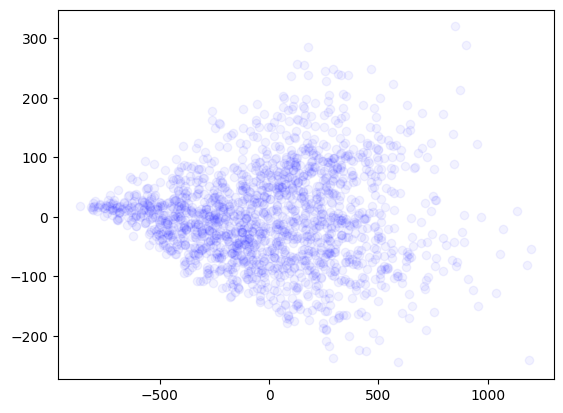

In [30]:
pca = PCA()
principalComponents = pca.fit_transform(reindex_intersection.T)
principalDf = pd.DataFrame(data = principalComponents)
plt.scatter(principalDf[[0]], principalDf[[1]], c='blue', alpha=0.05)
plt.show()

### Scaling

In [22]:
file_list = glob.glob("../../PTP1B_DK/mtzs_reindex/PTP1B*mtz")
file_list.sort()

In [24]:
scaler = valdo.Scaler(file_list[0])

In [ ]:
metrics = scaler.batch_scaling(file_list, outputmtz_path="../../PTP1B_DK/scaled_reindexed_mtzs/", verbose=False)

/n/home10/phyllis/mambaforge/envs/valdo/lib/python3.10/site-packages/valdo/scaling.py:73: RuntimeWarning: overflow encountered in exp
  FB_scaled = np.exp(ln_k) * np.exp(-args) * FB
/n/home10/phyllis/mambaforge/envs/valdo/lib/python3.10/site-packages/valdo/scaling.py:73: RuntimeWarning: invalid value encountered in multiply
  FB_scaled = np.exp(ln_k) * np.exp(-args) * FB
/n/home10/phyllis/mambaforge/envs/valdo/lib/python3.10/site-packages/valdo/scaling.py:73: RuntimeWarning: overflow encountered in exp
  FB_scaled = np.exp(ln_k) * np.exp(-args) * FB
/n/home10/phyllis/mambaforge/envs/valdo/lib/python3.10/site-packages/valdo/scaling.py:73: RuntimeWarning: invalid value encountered in multiply
  FB_scaled = np.exp(ln_k) * np.exp(-args) * FB


In [3]:
import pandas as pd

In [32]:
metrics_df = pd.read_pickle("../../PTP1B_DK/scaled_reindexed_mtzs/metrics.pkl")

In [33]:
metrics_df.columns=['file', 'start_LS', 'start_corr', 'end_LS', 'end_corr']

In [34]:
metrics_df[metrics_df.isna().any(axis=1)]

,file,start_LS,start_corr,end_LS,end_corr
93,PTP1B-y0110_mrflagsref_idxs,2627835.75,0.995908,NaN,NaN


In [35]:
low_corr_files = list(metrics_df[(metrics_df['end_corr'] < 0.6) | (metrics_df['end_corr'].isnull())]['file'])
low_corr_files = ['../../PTP1B_DK/scaled_reindexed_mtzs/'+x+'_scaled.mtz' for x in low_corr_files]

### VAE IO Generation

In [36]:
file_list = glob.glob("../../PTP1B_DK/scaled_reindexed_mtzs/PTP1B*mtz")
file_list.sort()

In [37]:
file_list = [file for file in file_list if file not in low_corr_files]

In [35]:
valdo.preprocessing.find_intersection(file_list, '../../PTP1B_DK/scaled_reindexed_mtzs/intersection.pkl')

100%|██████████| 1612/1612 [00:38<00:00, 41.52it/s]


In [36]:
valdo.preprocessing.find_union(file_list, '../../PTP1B_DK/scaled_reindexed_mtzs/union.pkl')

100%|██████████| 1612/1612 [00:38<00:00, 41.77it/s]


In [37]:
valdo.preprocessing.generate_vae_io('../../PTP1B_DK/scaled_reindexed_mtzs/intersection.pkl', '../../PTP1B_DK/scaled_reindexed_mtzs/union.pkl', '../PTP1B_DK/vae')

/n/home10/phyllis/mambaforge/envs/valdo/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(array([[-0.9153019 , -0.86356974, -0.98253024, ..., -0.30808422,
         -0.94848543, -0.9049642 ],
        [-0.22312748,  0.24120401,  0.09287775, ..., -0.5199777 ,
          0.19440298, -0.28793183],
        [ 0.1035641 , -0.6614434 , -0.3139489 , ...,  0.00721241,
          0.1051597 , -0.68902916],
        ...,
        [-0.11526511, -0.2313371 , -0.21490651, ..., -0.35294855,
         -0.2406276 ,  0.24124278],
        [ 2.750776  , -1.0604132 ,  0.77513885, ..., -4.388244  ,
         -3.4256606 , -2.0887082 ],
        [ 1.0820954 , -1.6331459 , -0.16185795, ...,  0.264286  ,
          0.15103969,  0.86399406]], dtype=float32),
 array([[-1.5056564 , -0.8266148 , -1.1848344 , ...,         nan,
                 nan,         nan],
        [ 0.08637906, -0.7760696 ,  0.09906079, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.3041014 , -0.02113722, -0.1

### VAE Training

In [4]:
import numpy as np
import torch
from tqdm import tqdm

In [4]:
vae_input = np.load('../PTP1B_DK/vae/vae_input.npy')
vae_output = np.load('../PTP1B_DK/vae/vae_output.npy')

In [79]:
latent_dimension = 3

vae = valdo.VAE(n_dim_i = vae_input.shape[1], 
      n_dim_o = vae_output.shape[1], 
      n_dim_latent = latent_dimension, 
      n_hidden_layers = [3, 6], 
      n_hidden_size = 100, 
      activation = torch.relu)

choice = np.random.choice(vae_input.shape[0], 1300, replace=False)    
train_ind = np.zeros(vae_input.shape[0], dtype=bool)
train_ind[choice] = True
test_ind = ~train_ind

x_train, x_val = vae_input[train_ind], vae_input[test_ind]
y_train, y_val = vae_output[train_ind], vae_output[test_ind]

x_train, x_val, y_train, y_val = torch.tensor(x_train), torch.tensor(x_val), torch.tensor(y_train), torch.tensor(y_val)

optimizer = torch.optim.Adam(vae.parameters(), lr=0.001)
vae.train(x_train, y_train, optimizer, x_val, y_val, epochs=300, batch_size=100, w_kl=1.0)

vae.save(f'../../PTP1B_DK/vae/relu/latent-dim-{latent_dimension}.pkl')

Epoch 300: 100%|██████████| 13/13 [00:00<00:00, 17.43it/s, Testloss=4.8e+4, Trainloss=4.4e+4, memory=0.437]  


In [77]:
vae = valdo.VAE.load(f'../../PTP1B_DK/vae/relu/latent-dim-{latent_dimension}.pkl')
loss_array = np.array(vae.loss_train)

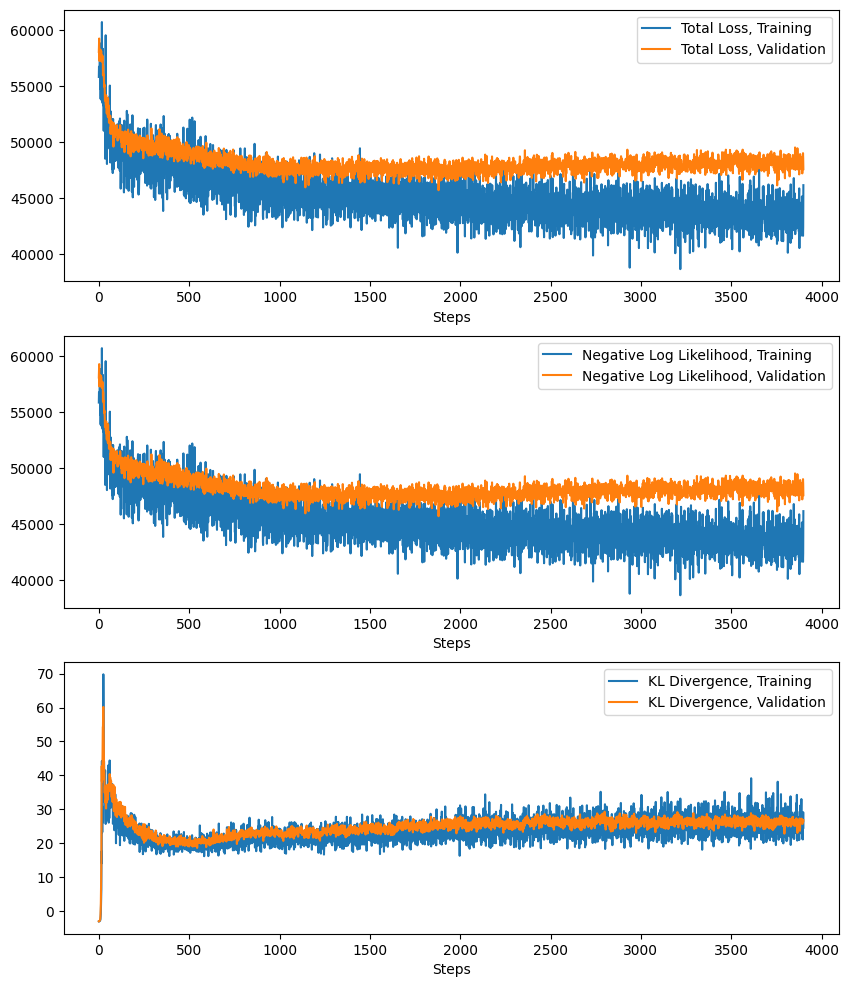

In [78]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=[10,12])
ax = axs.reshape(-1)

ax[0].plot(loss_array[:,0], label='Total Loss, Training')
ax[0].plot(loss_array[:,3], label='Total Loss, Validation')
ax[0].set_xlabel("Steps")
ax[0].legend()

ax[1].plot(loss_array[:,1], label='Negative Log Likelihood, Training')
ax[1].plot(loss_array[:,4], label='Negative Log Likelihood, Validation')
ax[1].set_xlabel("Steps")
ax[1].legend()

ax[2].plot(loss_array[:,2], label='KL Divergence, Training')
ax[2].plot(loss_array[:,5], label='KL Divergence, Validation')
ax[2].set_xlabel("Steps")
ax[2].legend()


plt.show()

### Reconstruction

In [17]:
vae = valdo.VAE.load('../../PTP1B_DK/vae/tanh/latent-dim-3.pkl')

In [18]:
vae_input_tensor = torch.tensor(vae_input)
vae_input_tensor = vae_input_tensor.to("cuda:0")

In [26]:
recons = vae.reconstruct(torch.tensor(vae_input_tensor))
recons = recons.detach().cpu().numpy()
np.save('../../PTP1B_DK/vae/tanh/recons-3/recons', recons)

/tmp/ipykernel_186495/1393690889.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  recons = vae.reconstruct(torch.tensor(vae_input_tensor))


In [41]:
valdo.preprocessing.reconstruct(recons_path='../../PTP1B_DK/vae/tanh/recons-3/recons.npy', 
            intersection_path='../../PTP1B_DK/scaled_reindexed_mtzs/intersection.pkl', 
            union_path='../../PTP1B_DK/scaled_reindexed_mtzs/union.pkl', 
            input_files=file_list, 
            info_folder='../../PTP1B_DK/vae', 
            output_folder='../../PTP1B_DK/vae/tanh/recons-3')

100%|██████████| 1612/1612 [06:03<00:00,  4.44it/s]


In [53]:
for latent_dimension in [2, 3, 4, 5, 6, 7, 8, 9]:
    
    vae = valdo.VAE.load(f'../../PTP1B_DK/vae/relu/latent-dim-{latent_dimension}.pkl')
    
    recons = vae.reconstruct(torch.tensor(vae_input_tensor))
    recons = recons.detach().cpu().numpy()
    np.save(f'../../PTP1B_DK/vae/relu/recons-{latent_dimension}/recons', recons)
    
    valdo.preprocessing.reconstruct(recons_path=f'../../PTP1B_DK/vae/relu/recons-{latent_dimension}/recons.npy', 
            intersection_path='../../PTP1B_DK/scaled_reindexed_mtzs/intersection.pkl', 
            union_path='../../PTP1B_DK/scaled_reindexed_mtzs/union.pkl', 
            input_files=file_list, 
            info_folder='../../PTP1B_DK/vae', 
            output_folder=f'../../PTP1B_DK/vae/relu/recons-{latent_dimension}')

/tmp/ipykernel_186495/3560551862.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  recons = vae.reconstruct(torch.tensor(vae_input_tensor))
100%|██████████| 1612/1612 [03:42<00:00,  7.25it/s]
/tmp/ipykernel_186495/3560551862.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  recons = vae.reconstruct(torch.tensor(vae_input_tensor))
100%|██████████| 1612/1612 [03:43<00:00,  7.23it/s]
/tmp/ipykernel_186495/3560551862.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  recons = vae.reconstruct(torch.tensor(vae_input_tensor))
100%|█████████

### Add Phases

In [16]:
file_list = glob.glob("../PTP1B_DK/vae/recons_6_mtzs/PTP1B*mtz")
file_list.sort()

In [56]:
import re

In [18]:
for file in tqdm(file_list):
        
    current = rs.read_mtz(file)
    
    match = re.match(r".*PTP1B-(y\d{4}).*", file)
    
    PTP1B_id = match.group(1)
    
    try:
        phases_file = glob.glob(f'../PTP1B_DK/pandda_input_models_refined_waters/*{PTP1B_id}*.mtz')[0]
    except:
        continue
        
    phases_df = rs.read_mtz(phases_file)
    
    current['refine_PH2FOFCWT'] = phases_df['PH2FOFCWT']
    current['refine_PHFOFCWT'] = phases_df['PHFOFCWT']
    
    current.write_mtz(os.path.dirname(file) + '_phases/' + os.path.basename(file))

100%|██████████| 1679/1679 [01:45<00:00, 15.88it/s]


### Blob Analysis

In [4]:
file_list = glob.glob("../../PTP1B_DK/vae/relu/recons-6-phases/PTP1B*mtz")
file_list.sort()

In [3]:
from valdo import blobs
import gemmi

In [5]:
blobs.generate_preprocess_diff_map_blobs(file_list, '../../PTP1B_DK/pandda_input_models_refined_waters', 'F-obs-diff', 'refine_PH2FOFCWT', '../../PTP1B_DK/vae/relu/blobs-6', cutoff=3.5)

  0%|          | 0/1572 [00:00<?, ?it/s]


NameError: name 'gemmi' is not defined

In [22]:
blob_df = pd.read_pickle('../PTP1B_DK/vae/blob_stats_6/blob_stats.pkl')

In [23]:
# BOUND SAMPLES

with open("../bound_sample_ids.txt") as f:
    bound_samples = set([line.strip() for line in f])

# Set the "bound" column based on whether or not each sample is in the bound samples list
blob_df["bound"] = blob_df["sample"].apply(lambda x: 1 if x in bound_samples else 0)

In [25]:
blob_df_cys_215_tag = tag_cys_215_blobs(blob_df, '../PTP1B_DK/pandda_input_models_refined_waters')

11316it [02:20, 80.40it/s]


In [26]:
blob_df_cys_215_tag['radius'] = blob_df_cys_215_tag['volume'].apply(lambda x: (x * 3/(4*np.pi))**(1/3))

In [27]:
blob_df_cys_215_lig_tag = tag_lig_blobs(blob_df_cys_215_tag, '../PTP1B_DK/all_bound_models_reindexed')

11316it [00:11, 982.87it/s] 


In [29]:
blob_df_cys_215_lig_tag.to_pickle('../PTP1B_DK/vae/blob_stats_6/blob_stats_tagged.pkl')

In [41]:
from sklearn import metrics
import matplotlib.pyplot as plt

hg_no_lig = ['0060', '1429', '1733', '1791', '0225', '0432', '0710']

def plot_roc_blob_stats(path, name=''):
    
    blob_stats_df = pd.read_pickle(path)
    
    # remove cysteines
    blob_stats_filtered = blob_stats_df[blob_stats_df['cys215']==0]    
    
    # remove samples where HG doesn't publish a ligand in the bound state
    blob_stats_filtered = blob_stats_filtered[~blob_stats_filtered['sample'].isin(hg_no_lig)]        
    
    # filter R factors
    r_factors = pd.read_csv('../PTP1B_DK/pandda_input_models_refined_waters/refine_stats.csv')[['data_id', 'Rfree_final']]
    high_r_factors = r_factors.loc[r_factors['Rfree_final'] > 0.4, 'data_id'].astype(str).str.zfill(4)
    blob_stats_filtered = blob_stats_filtered[~blob_stats_filtered['sample'].isin(high_r_factors)]
    
    # create ROC curve
    fpr, tpr, thresholds = metrics.roc_curve(blob_stats_filtered["ligand"], blob_stats_filtered["score"], pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=name)
    display.plot()
    
    print("Total Number of Blobs:", len(blob_stats_filtered))
    print("Total Number of Unique Samples:", len(blob_stats_filtered.drop_duplicates(subset='sample')))
    
    plt.savefig(os.path.dirname(path) + '/roc_curve.pdf')
    blob_stats_filtered.to_pickle(os.path.dirname(path) + '/filtered_blob_stats_tagged.pkl')
    
    return blob_stats_filtered

Total Number of Blobs: 10050
Total Number of Unique Samples: 1504


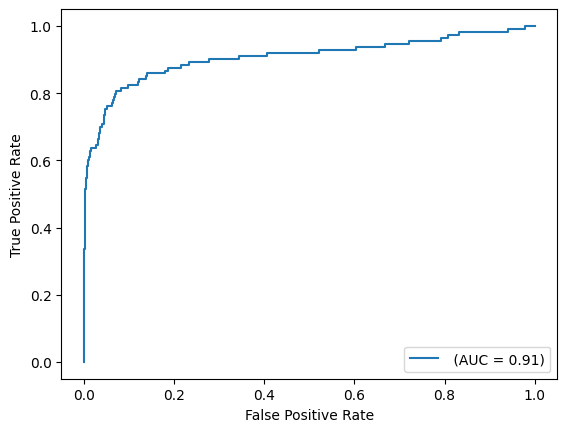

In [44]:
filtered = plot_roc_blob_stats('../PTP1B_DK/vae/blob_stats_6/blob_stats_tagged.pkl')

### Remove Blobs Close to Each Other

In [2]:
import pandas as pd

In [3]:
blobs_df = pd.read_pickle('../PTP1B_DK/vae/blob_stats_6/blob_stats_tagged.pkl')

In [4]:
# apply fractionalize function to blobs_df
blobs_df[['fractional', 'smallest_x_frac', 'smallest_x_cart']] = blobs_df.apply(determine_locations, args=('../PTP1B_DK/vae/recons_6_mtzs_phases',), axis=1)


In [5]:
blobs_df

,sample,peakz,peak,score,cenx,ceny,cenz,volume,radius,bound,cys215,ligand,fractional,smallest_x_frac,smallest_x_cart
0,0001,4.259366,4.259366,61.517408,-11.082027,36.314721,0.402368,16.310245,1.573224,0,0,0,"[0.11022343320583718, 0.46760666399323336, 0.0...","[0.11022343320583718, 0.4676066639932334, 0.00...","[-11.082027424063146, 36.31472074348405, 0.402..."
1,0001,4.021799,4.021799,48.110344,40.558690,3.598726,0.528509,12.956737,1.457032,0,0,0,"[0.4754548727680972, 0.046339014837837186, 0.0...","[0.04633901483783718, 0.4754548727680972, 0.99...","[-17.1627567021565, 36.92421913591899, 105.846..."
2,0002,4.863809,4.863808,710.902529,5.001769,46.439976,30.412528,184.446977,3.531243,0,1,0,"[0.35268054289899614, 0.5944645040047057, 0.28...","[0.24178396110570954, 0.6473194571010039, 0.95...","[-7.38568547812493, 50.56904106861582, 101.785..."
3,0002,4.400714,4.400713,94.056749,1.289913,51.651995,2.741077,24.558821,1.803182,0,0,0,"[0.34489065120826223, 0.6611820284169256, 0.02...","[0.31629137720866346, 0.6551093487917379, 0.69...","[-1.0160169860690438, 51.17759276362122, 74.11..."
4,0002,4.359015,4.359014,81.993119,11.704898,34.755441,30.359400,21.488968,1.724682,0,0,0,"[0.35220452776706446, 0.44489420516587036, 0.2...","[0.09268967739880589, 0.6477954722329355, 0.95...","[-20.856354144685394, 50.60622769801784, 101.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11311,1966,5.113978,5.113978,96.237517,10.073316,38.926534,18.853943,23.734881,1.782787,0,0,0,"[0.3634040922851935, 0.5018644995578783, 0.177...","[0.1384604072726848, 0.6365959077148065, 0.844...","[-16.10679018476712, 49.37681882671382, 89.563..."
11312,1966,5.012110,5.012110,73.771338,22.651822,36.661052,25.492097,18.238382,1.632924,0,0,0,"[0.48924322293772715, 0.4726565311063102, 0.24...","[0.016586691831417033, 0.5273434688936898, 0.4...","[-22.129677671765556, 40.902780881022764, 45.2..."
11313,1966,5.480166,5.480166,70.236508,1.962838,76.231070,9.770825,16.989178,1.594757,0,0,0,"[0.5133243286127659, 0.9828172055562511, 0.092...","[0.017182794443748928, 0.5305071230565148, 0.4...","[-22.217962112389824, 41.148166024934454, 45.1..."
11314,1966,4.384883,4.384883,62.797114,-0.781670,24.510741,29.685101,16.239655,1.570951,0,0,0,"[0.14927607669241594, 0.31600734853918755, 0.2...","[0.14927607669241594, 0.31600734853918755, 0.2...","[-0.7816698218047726, 24.51074128443813, 29.68..."
